@Ngoc Tan Le

---

Dimanche 05 Janvier 2019
# **Classifying movie reviews: a binary classification example**
Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

*IMDB dataset*: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [0]:
# coding: utf-8

In [0]:
import time
import logging
from functools import wraps
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline
warnings.filterwarnings("ignore")

COL_NAME_METHOD_NAME = "Testcase"
COL_NAME_ACCURACY = "Accuracy"
COL_NAME_DURATION = "Duration"
COL_NAMES = [COL_NAME_METHOD_NAME, COL_NAME_ACCURACY]

In [0]:
# class decorator_class
class decorator_class(object):

    def __init__(self, original_function):
        self.original_function = original_function

    def __call__(self, *args, **kwargs):
        print('call method before {}'.format(self.original_function.__name__))
        self.original_function(*args, **kwargs)


def logger(original_func):
    logging.basicConfig(filename='{}.log'.format(original_func.__name__),
                        level=logging.INFO)

    @wraps(original_func)
    def wrapper(*args, **kwargs):
        logging.info('Ran with args: {}, and kwargs: {}'.format(args, kwargs))
        return original_func(*args, **kwargs)
    return wrapper


def cls_timer(original_func):
    @wraps(original_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = original_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(original_func.__name__, round(t2,2)))
        return result
    return wrapper

# class Normalize
class Normalize(object):
    def normalize(self, X_train, X_test):
        self.scaler = MinMaxScaler()
        X_train = self.scaler.fit_transform(X_train)
        X_test  = self.scaler.transform(X_test)
        return (X_train, X_test)

    def inverse(self, X_train, X_test):
        X_train = self.scaler.inverse_transform(X_train)
        X_test  = self.scaler.inverse_transform(X_test)
        return (X_train, X_test)

In [7]:
# Deep learning Librairies
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


## Utils

In [0]:
# Class algo_logistic_regression for Machine Learning
class algo_logistic_regression(object):

    @logger
    @cls_timer
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train, self.y_train, self.X_test, self.y_test = X_train, y_train, X_test, y_test

    @logger
    @cls_timer
    def fit(self):
        normalizer = Normalize()
        self.X_train, self.X_test = normalizer.normalize(self.X_train, self.X_test)
        train_samples = self.X_train.shape[0]
        self.classifier = LogisticRegression(
            C=50. / train_samples,
            multi_class='multinomial',
            penalty='l1',
            solver='saga',
            tol=0.1,
            class_weight='balanced')
        self.classifier.fit(self.X_train, self.y_train)
        self.train_y_predicted = self.classifier.predict(self.X_train)
        self.train_accuracy = round(np.mean(self.train_y_predicted.ravel() == self.y_train.ravel()) * 100, 2)
        self.train_confusion_matrix = confusion_matrix(self.y_train, self.train_y_predicted)

        return self.train_accuracy

    @logger
    @cls_timer
    def predict(self):
        self.test_y_predicted = self.classifier.predict(self.X_test)
        self.test_accuracy = round(np.mean(self.test_y_predicted.ravel() == self.y_test.ravel()) * 100, 2)
        self.test_confusion_matrix = confusion_matrix(self.y_test, self.test_y_predicted)
        self.report = classification_report(self.y_test, self.test_y_predicted)
        print("Classification report for classifier Logistic Regression:\n %s\n" % (self.report))
        return self.test_accuracy

    @logger
    @cls_timer
    def predict_dummy(self):
        """Dummy prediction with baseline obtained result between [0,9]
        """
        #self.test_y_predicted_baseline = np.array([str(x) for x in np.random.randint(10, size=len(self.X_test))])
        self.test_y_predicted_baseline = np.array([x for x in np.random.randint(10, size=len(self.X_test))])
        self.test_accuracy_baseline = round(np.mean(self.test_y_predicted_baseline.ravel() == self.y_test.ravel() * 100), 2)
        self.test_confusion_matrix_baseline = confusion_matrix(self.y_test, self.test_y_predicted_baseline)
        self.report_baseline = classification_report(self.y_test, self.test_y_predicted_baseline)
        print("Classification report for classifier - Baseline:\n %s\n" % (self.report_baseline))
        return self.test_accuracy_baseline


In [0]:
# Class algo_multilayer_perceptron for Machine Learning
class algo_multilayer_perceptron(object):

    @logger
    @cls_timer
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train, self.y_train, self.X_test, self.y_test = X_train, y_train, X_test, y_test

    @logger
    @cls_timer
    def fit(self):
        normalizer = Normalize()
        self.X_train, self.X_test = normalizer.normalize(self.X_train, self.X_test)
        train_samples = self.X_train.shape[0]
        self.classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                                        solver='sgd', verbose=10, random_state=1,
                                        learning_rate_init=.1)
        self.classifier.fit(self.X_train, self.y_train)
        self.train_y_predicted = self.classifier.predict(self.X_train)
        self.train_accuracy = round(np.mean(self.train_y_predicted.ravel() == self.y_train.ravel()) * 100, 2)
        self.train_confusion_matrix = confusion_matrix(self.y_train, self.train_y_predicted)
        return self.train_accuracy

    @logger
    @cls_timer
    def predict(self):
        self.test_y_predicted = self.classifier.predict(self.X_test)
        self.test_accuracy = round(np.mean(self.test_y_predicted.ravel() == self.y_test.ravel()) * 100, 2)
        self.test_confusion_matrix = confusion_matrix(self.y_test, self.test_y_predicted)
        self.report = classification_report(self.y_test, self.test_y_predicted)
        print("Classification report for classifier Logistic Regression:\n %s\n" % (self.report))
        return self.test_accuracy

    @logger
    @cls_timer
    def predict_dummy(self):
        """Dummy prediction with baseline obtained result between [0,9]
        """
        #self.test_y_predicted_baseline = np.array([str(x) for x in np.random.randint(10, size=len(self.X_test))])
        self.test_y_predicted_baseline = np.array([x for x in np.random.randint(10, size=len(self.X_test))])
        self.test_accuracy_baseline = round(np.mean(self.test_y_predicted_baseline.ravel() == self.y_test.ravel() * 100), 2)
        self.test_confusion_matrix_baseline = confusion_matrix(self.y_test, self.test_y_predicted_baseline)
        self.report_baseline = classification_report(self.y_test, self.test_y_predicted_baseline)
        print("Classification report for classifier - Baseline:\n %s\n" % (self.report_baseline))
        return self.test_accuracy_baseline

#1. Loading the IMDB dataset

In [0]:
from keras.datasets import imdb

In [11]:
# split train, test
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 10k top most frequent words

17465344/17464789 [==============================] - 2s 0us/step


In [12]:
len(train_data), len(test_data)

(25000, 25000)

In [13]:
print(train_data[0]) 
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [14]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()


1646592/1641221 [==============================] - 1s 1us/step


In [0]:
reserve_word_index = dict([(val, key) for (key, val) in word_index.items()])


Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [16]:
decoded_review = ' '.join([reserve_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#2. Preparing the data

In [0]:
import numpy as np

In [0]:
# function to vectorize a sequence
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # all-zero matrix of shape (x,y)

  for i, seq in enumerate(sequences):
    results[i, seq] = 1. 
  
  return results

In [0]:
# vectorize trainset, testset
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train[:2]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
y_train[:2]

array([1., 0.], dtype=float32)

# Baseline Model with Machine Learning with sklearn

In [0]:
results = [] # variable to stock (method_ML, accuracy)

## 1. Logistic Regression

In [24]:
t0 = time.time()
np.random.seed(42)
clf_logReg = algo_logistic_regression(x_train, y_train, x_test, y_test)
train_acc = clf_logReg.fit()

__init__ ran in: 0.0 sec
fit ran in: 25.8 sec


In [25]:
# Train accuracy
print("Train accuracy - baseline: ", train_acc)
print("Confusion Matrix \n", clf_logReg.train_confusion_matrix)

Train accuracy - baseline:  68.31
Confusion Matrix 
 [[7146 5354]
 [2568 9932]]


In [0]:
# Add to list results
method_name = "Train - Logistic Regression"
results.append((method_name, train_acc))

In [26]:
# Test accuracy
test_acc_baseline = clf_logReg.predict()
print("Test accuracy - baseline: ", test_acc_baseline)
print("Confusion Matrix \n", clf_logReg.test_confusion_matrix)

Classification report for classifier Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.74      0.57      0.64     12500
         1.0       0.65      0.80      0.72     12500

    accuracy                           0.68     25000
   macro avg       0.69      0.68      0.68     25000
weighted avg       0.69      0.68      0.68     25000


predict ran in: 0.41 sec
Test accuracy - baseline:  68.44
Confusion Matrix 
 [[ 7111  5389]
 [ 2500 10000]]


In [0]:
# Add to list results
method_name = "Test Logistic Regression"
results.append((method_name, test_acc_baseline))

In [59]:
results

[('Train - Logistic Regression', 68.31), ('Test Logistic Regression', 68.44)]

Sparsity with L1 penalty: 96.98%
Example run in 26.303 sec


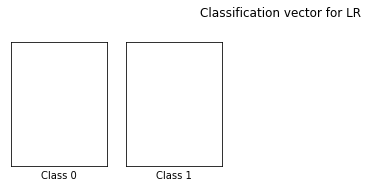

In [28]:
# Sparsity with L1 penalty
sparsity = np.mean(clf_logReg.classifier.coef_ ==0)*100
print("Sparsity with L1 penalty: %.2f%%" % sparsity)

coef = clf_logReg.classifier.coef_.copy()
plt.figure(figsize=(10,5))
scale = np.abs(coef).max()

for i in range(2):
  l1_plot = plt.subplot(2, 5, i+1)
  # l1_plot.imshow(coef[i].reshape(),      # error
  #                interpolation='nearest', 
  #                cmap=plt.cm.RdBu,
  #                vmin=-scale, vmax=scale)
  l1_plot.set_xticks(())
  l1_plot.set_yticks(())
  l1_plot.set_xlabel('Class %i' % i)

plt.suptitle("Classification vector for LR")

run_time = time.time() - t0
print("Example run in %.3f sec" % run_time)
plt.show()


## 2. MLP - MultiLayer Perceptron

In [29]:
t0 = time.time()
np.random.seed(42)
clf_MLP = algo_multilayer_perceptron(x_train, y_train, x_test, y_test)
train_acc_MLP = clf_MLP.fit()

# Train accuracy
print("Train accuracy - baseline: ", train_acc_MLP)
print("Confusion Matrix \n", clf_MLP.train_confusion_matrix)

__init__ ran in: 0.0 sec
Iteration 1, loss = 0.36977276
Iteration 2, loss = 0.24011666
Iteration 3, loss = 0.19881995
Iteration 4, loss = 0.15541971
Iteration 5, loss = 0.12015724
Iteration 6, loss = 0.08961149
Iteration 7, loss = 0.05399652
Iteration 8, loss = 0.03014972
Iteration 9, loss = 0.01486434
Iteration 10, loss = 0.00814872
fit ran in: 54.27 sec
Train accuracy - baseline:  100.0
Confusion Matrix 
 [[12500     0]
 [    0 12500]]


In [0]:
# Add to list results
method_name = "Train - MultiLayer Perceptron"
results.append((method_name, train_acc_MLP))

In [30]:
# Test accuracy
test_acc_MLP = clf_MLP.predict()
print("Test accuracy - baseline: ", test_acc_MLP)
print("Confusion Matrix \n", clf_MLP.test_confusion_matrix)

Classification report for classifier Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     12500
         1.0       0.88      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


predict ran in: 0.95 sec
Test accuracy - baseline:  87.2
Confusion Matrix 
 [[10974  1526]
 [ 1674 10826]]


In [0]:
# Add to list results
method_name = "Test MultiLayer Perceptron"
results.append((method_name, test_acc_MLP))

In [62]:
results

[('Train - Logistic Regression', 68.31),
 ('Test Logistic Regression', 68.44),
 ('Train - MultiLayer Perceptron', 100.0),
 ('Test MultiLayer Perceptron', 87.2)]

## Unittest

In [0]:
import unittest

class TestInput(unittest.TestCase):
  
    @classmethod
    def setUpClass(cls):
        # print('setupClass')   
        pass

    @classmethod
    def tearDownClass(cls): 
        # print('teardownClass')
        pass

    def setUp(self):
        print('setUp') 
               
        # split train, test
        (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 10k top most frequent words
        # vectorize trainset, testset
        x_train = vectorize_sequences(train_data)
        x_test = vectorize_sequences(test_data)
        # vectorize the labels
        y_train = np.asarray(train_labels).astype('float32')
        y_test = np.asarray(test_labels).astype('float32')
        self.X_train, self.y_train, self.X_test, self.y_test = x_train, y_train, x_test, y_test
        
        self.train_accuracy = 68.31
        self.train_confusion_matrix = np.matrix([[7146,    5354],
                                                 [2568,   9932]])
        
        self.test_accuracy = 68.44
        self.test_confusion_matrix = np.matrix([[7111,    5389],
                                                 [2500,   10000]])

        
    def tearDown(self):
        # print('tearDown')
        pass
        
        
    def test_fit(self):     
        np.random.seed(42)
        self.ta = algo_logistic_regression(self.X_train, self.y_train, self.X_test, self.y_test)
        self.assertEqual(self.ta.fit(), self.train_accuracy) 
        self.assertEqual(self.ta.train_confusion_matrix.tolist(), self.train_confusion_matrix.tolist())  
  

    def test_predict(self):
        np.random.seed(42)
        self.ta = algo_logistic_regression(self.X_train, self.y_train, self.X_test, self.y_test)
        self.ta.fit()
        self.assertEqual(self.ta.predict(), self.test_accuracy)
        self.assertEqual(self.ta.train_confusion_matrix.tolist(), self.train_confusion_matrix.tolist()) 


In [96]:
#run tests 
unittest.main(argv=['first-arg-is-ignored'], exit=False)

setUp
__init__ ran in: 0.0 sec


.

fit ran in: 26.03 sec
setUp
__init__ ran in: 0.0 sec
fit ran in: 24.12 sec


.

Classification report for classifier Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.74      0.57      0.64     12500
         1.0       0.65      0.80      0.72     12500

    accuracy                           0.68     25000
   macro avg       0.69      0.68      0.68     25000
weighted avg       0.69      0.68      0.68     25000


predict ran in: 0.41 sec



----------------------------------------------------------------------
Ran 2 tests in 65.361s

OK


## 3. Building a network

In [0]:
from keras import models
from keras import layers, optimizers

In [32]:
# Three layers
input_tensor = layers.Input(shape=(10000,))
x = layers.Dense(32, activation='tanh')(input_tensor)  
x = layers.Dense(32, activation='tanh')(x)             

output_tensor = layers.Dense(1, activation='sigmoid')(x)

In [0]:
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [34]:
model.summary()   # summary of the NN architecture

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________


In [35]:
# compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [73]:
# train a model
history = model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 6s 228us/step - loss: 0.1239 - acc: 0.9716
Epoch 2/10
25000/25000 [==============================] - 3s 118us/step - loss: 0.0598 - acc: 0.9815
Epoch 3/10
25000/25000 [==============================] - 3s 111us/step - loss: 0.0406 - acc: 0.9874
Epoch 4/10
25000/25000 [==============================] - 3s 107us/step - loss: 0.0293 - acc: 0.9909
Epoch 5/10
25000/25000 [==============================] - 3s 106us/step - loss: 0.0222 - acc: 0.9930
Epoch 6/10
25000/25000 [==============================] - 3s 107us/step - loss: 0.0168 - acc: 0.9949
Epoch 7/10
25000/25000 [==============================] - 3s 109us/step - loss: 0.0131 - acc: 0.9962
Epoch 8/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.0096 - acc: 0.9974
Epoch 9/10
25000/25000 [==============================] - 3s 109us/step - loss: 0.0073 - acc: 0.9978
Epoch 10/10
25000/25000 [==============================] - 3s 107us/step - loss: 0.0049 - a

In [0]:
# With LSTM
from keras import preprocessing
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.layers import LSTM

# hyper-parameters
max_features = 10000 # number of words to consider as features, 10k most common words
maxlen = 20 # cuts off the text after 20 words (among the max_features most common words)

# Raw data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # pad sequences to the same length
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) # pad sequences to the same length

In [101]:
# Building a network
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=8, input_length=maxlen))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid')) # output layer

# compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# summary
model.summary()

# Training
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # 10% of x_train

# Evaluate
score, acc = model.evaluate(x_test, y_test)
print('test score = ', score)
print('test accuracy = ', acc)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 32)            5248      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 93,601
Trainable params: 93,601
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 23s 1ms/step - loss: 0.5784 - acc: 0.6852 - val_loss: 0.6011 - val_acc: 0.6888
Epoch 2/10
22500/22500 [==============================] - 22s 

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

In [75]:
history.history

{'acc': [0.971600000038147,
  0.981520000038147,
  0.9874400000190735,
  0.99088,
  0.99304,
  0.99488,
  0.9962,
  0.99744,
  0.99784,
  0.99872],
 'loss': [0.1238527124261856,
  0.05982205800533295,
  0.04059185327649117,
  0.02931500919409096,
  0.02220388704650104,
  0.016783954836502673,
  0.01305174713626504,
  0.009591524589210748,
  0.007290254154801369,
  0.004923677662909031]}

In [0]:
# Draw a graphic
import matplotlib.pyplot as plt

In [0]:
# without validation set
loss_value = history_dict['loss']
acc_value = history_dict['acc']

In [0]:
# Add to list results
method_name = "Train Recurrent Neural Network"
results.append((method_name, max(acc_value)*100))

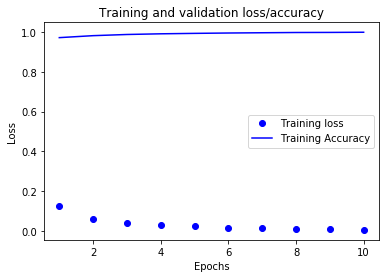

In [78]:
plt.plot(epochs, loss_value,'bo', label='Training loss')    # bo: blue dot
# plt.plot(epochs, val_loss_value,'y', label='Validation loss')    # bo: blue dot
plt.plot(epochs, acc_value, 'b', label='Training Accuracy')          # 'b': solid blue line
# plt.plot(epochs, val_acc_value, 'r', label='Validation Accuracy')          # 'b': solid blue line
plt.title('Training and validation loss/accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

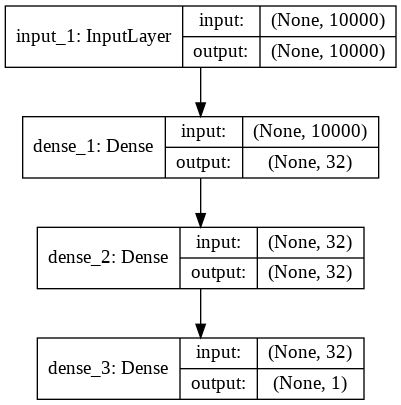

In [50]:
# draw model 
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

## Evaluate the model

In [79]:
resultsNN = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 160us/step


In [0]:
# Add to list results
method_name = "Test Recurrent Neural Network"
results.append((method_name, resultsNN[1]*100))

In [83]:
# predict
model.predict(x_test)

array([[2.7759671e-03],
       [9.9999857e-01],
       [9.9999648e-01],
       ...,
       [5.2705407e-04],
       [2.0641088e-04],
       [6.5531462e-02]], dtype=float32)

# Comparison of multiple models [baseline versus models]

In [102]:
results

[('Train - Logistic Regression', 68.31),
 ('Test Logistic Regression', 68.44),
 ('Train - MultiLayer Perceptron', 100.0),
 ('Test MultiLayer Perceptron', 87.2),
 ('Train Recurrent Neural Network', 99.872),
 ('Test Recurrent Neural Network', 83.76)]

In [103]:
df = pd.DataFrame(columns=COL_NAMES, data=results)
df

,Testcase,Accuracy
0,Train - Logistic Regression,68.310
1,Test Logistic Regression,68.440
2,Train - MultiLayer Perceptron,100.000
3,Test MultiLayer Perceptron,87.200
4,Train Recurrent Neural Network,99.872
5,Test Recurrent Neural Network,83.760


In above result, we observe that the accuracy score of method MLP is the best one and it is higher than MLP's accuracy score about 3%.

In summary, in this notebook, we performed:

* How to train a baseline model versus multiple models

* How to use unit tests for the API, the model and the logging

* Can all of the unit tests be run with a single script and do all of the unit tests pass?

* A mechanism to monitor performance

* A performance comparison between multiple models

* Visualizations for the EDA investigation